In [28]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Import the data
data = pd.read_csv("../data/string_interactions.tsv", delimiter = "\t")

# Convert the data into a data frame
df = pd.DataFrame(data, columns = ['#node1', 'node2'])
df

,#node1,node2
0,ACR,SPAM1
1,ACR,ADAM2
2,ACR,ZP1
3,ACR,IZUMO2
4,ACR,IZUMO3
...,...,...
243,ZP4,B4GALT1
244,ZP4,ZP3
245,ZP4,ZP2
246,ZP4,ADAM21


In [3]:
# Read a graph from pandas df containing an edgelist
fertilization = nx.from_pandas_edgelist(df, source = "#node1", target = "node2")

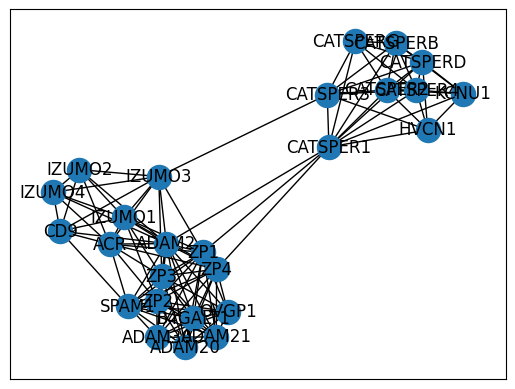

In [32]:
nx.draw_networkx(fertilization)

plt.savefig('../output/fertilization-network.png')

In [20]:
# Count the number of nodes
nx.number_of_nodes(fertilization) #26 proteins
# Count the number of edges
nx.number_of_edges(fertilization) # 124 interactions

124

In [25]:
# Degree of all nodes
nx.degree(fertilization)

DegreeView({'ACR': 11, 'SPAM1': 12, 'ADAM2': 17, 'ZP1': 14, 'IZUMO2': 6, 'IZUMO3': 9, 'CD9': 7, 'ZP4': 13, 'ZP3': 13, 'IZUMO4': 6, 'IZUMO1': 10, 'ZP2': 12, 'CATSPER1': 11, 'OVGP1': 10, 'B4GALT1': 10, 'ADAM30': 10, 'ADAM21': 10, 'ADAM20': 10, 'CATSPERB': 7, 'CATSPER3': 8, 'HVCN1': 6, 'KCNU1': 6, 'CATSPER2': 8, 'CATSPER4': 8, 'CATSPERD': 8, 'CATSPERG': 6})

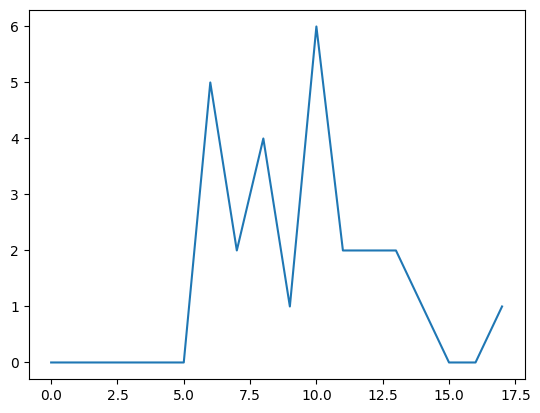

In [37]:
plt.plot(nx.degree_histogram(fertilization))
# X-axis = Degree
# Y-axis = Frequency of degree
plt.savefig('../output/degree-histogram.png')

In [48]:
degrees = dict(nx.degree(fertilization))
hub = max(degrees, key = degrees.get)
print("This network contains a hub", hub, "with a degree of", degrees[hub])

This network contains a hub ADAM2 with a degree of 17


In [49]:
nx.betweenness_centrality(fertilization)

{'ACR': 0.01630952380952381,
 'SPAM1': 0.014111111111111116,
 'ADAM2': 0.21144841269841266,
 'ZP1': 0.10678174603174607,
 'IZUMO2': 0.0,
 'IZUMO3': 0.0855,
 'CD9': 0.003781746031746032,
 'ZP4': 0.09408730158730162,
 'ZP3': 0.017753968253968255,
 'IZUMO4': 0.0,
 'IZUMO1': 0.012527777777777778,
 'ZP2': 0.006587301587301587,
 'CATSPER1': 0.3495277777777778,
 'OVGP1': 0.0,
 'B4GALT1': 0.0,
 'ADAM30': 0.0,
 'ADAM21': 0.0,
 'ADAM20': 0.0,
 'CATSPERB': 0.0016388888888888892,
 'CATSPER3': 0.06983333333333334,
 'HVCN1': 0.0009722222222222222,
 'KCNU1': 0.0005555555555555556,
 'CATSPER2': 0.0028611111111111116,
 'CATSPER4': 0.0028611111111111116,
 'CATSPERD': 0.0028611111111111116,
 'CATSPERG': 0.0}

In [27]:
nx.closeness_centrality(fertilization)

{'ACR': 0.5434782608695652,
 'SPAM1': 0.5434782608695652,
 'ADAM2': 0.7575757575757576,
 'ZP1': 0.6944444444444444,
 'IZUMO2': 0.49019607843137253,
 'IZUMO3': 0.5952380952380952,
 'CD9': 0.5,
 'ZP4': 0.6756756756756757,
 'ZP3': 0.5681818181818182,
 'IZUMO4': 0.49019607843137253,
 'IZUMO1': 0.5319148936170213,
 'ZP2': 0.5434782608695652,
 'CATSPER1': 0.6410256410256411,
 'OVGP1': 0.5208333333333334,
 'B4GALT1': 0.5208333333333334,
 'ADAM30': 0.5208333333333334,
 'ADAM21': 0.5208333333333334,
 'ADAM20': 0.5208333333333334,
 'CATSPERB': 0.44642857142857145,
 'CATSPER3': 0.5102040816326531,
 'HVCN1': 0.43859649122807015,
 'KCNU1': 0.43103448275862066,
 'CATSPER2': 0.45454545454545453,
 'CATSPER4': 0.45454545454545453,
 'CATSPERD': 0.45454545454545453,
 'CATSPERG': 0.43859649122807015}

In [24]:
# Identify a diameter of a network
nx.diameter(fertilization)

3

In [23]:
# Count the number of cliques (a complete subgraph where all nodes are connected)
nx.number_of_cliques(fertilization)

{'ACR': 5,
 'SPAM1': 3,
 'ADAM2': 7,
 'ZP1': 5,
 'IZUMO2': 1,
 'IZUMO3': 3,
 'CD9': 2,
 'ZP4': 4,
 'ZP3': 4,
 'IZUMO4': 1,
 'IZUMO1': 3,
 'ZP2': 3,
 'CATSPER1': 5,
 'OVGP1': 1,
 'B4GALT1': 1,
 'ADAM30': 1,
 'ADAM21': 1,
 'ADAM20': 1,
 'CATSPERB': 2,
 'CATSPER3': 3,
 'HVCN1': 2,
 'KCNU1': 2,
 'CATSPER2': 4,
 'CATSPER4': 4,
 'CATSPERD': 4,
 'CATSPERG': 1}

In [22]:
# Find the largest clique
max(nx.find_cliques(fertilization), key = len)

['ADAM2',
 'ZP1',
 'ZP3',
 'ZP2',
 'ZP4',
 'SPAM1',
 'ADAM30',
 'ADAM21',
 'ADAM20',
 'B4GALT1',
 'OVGP1']

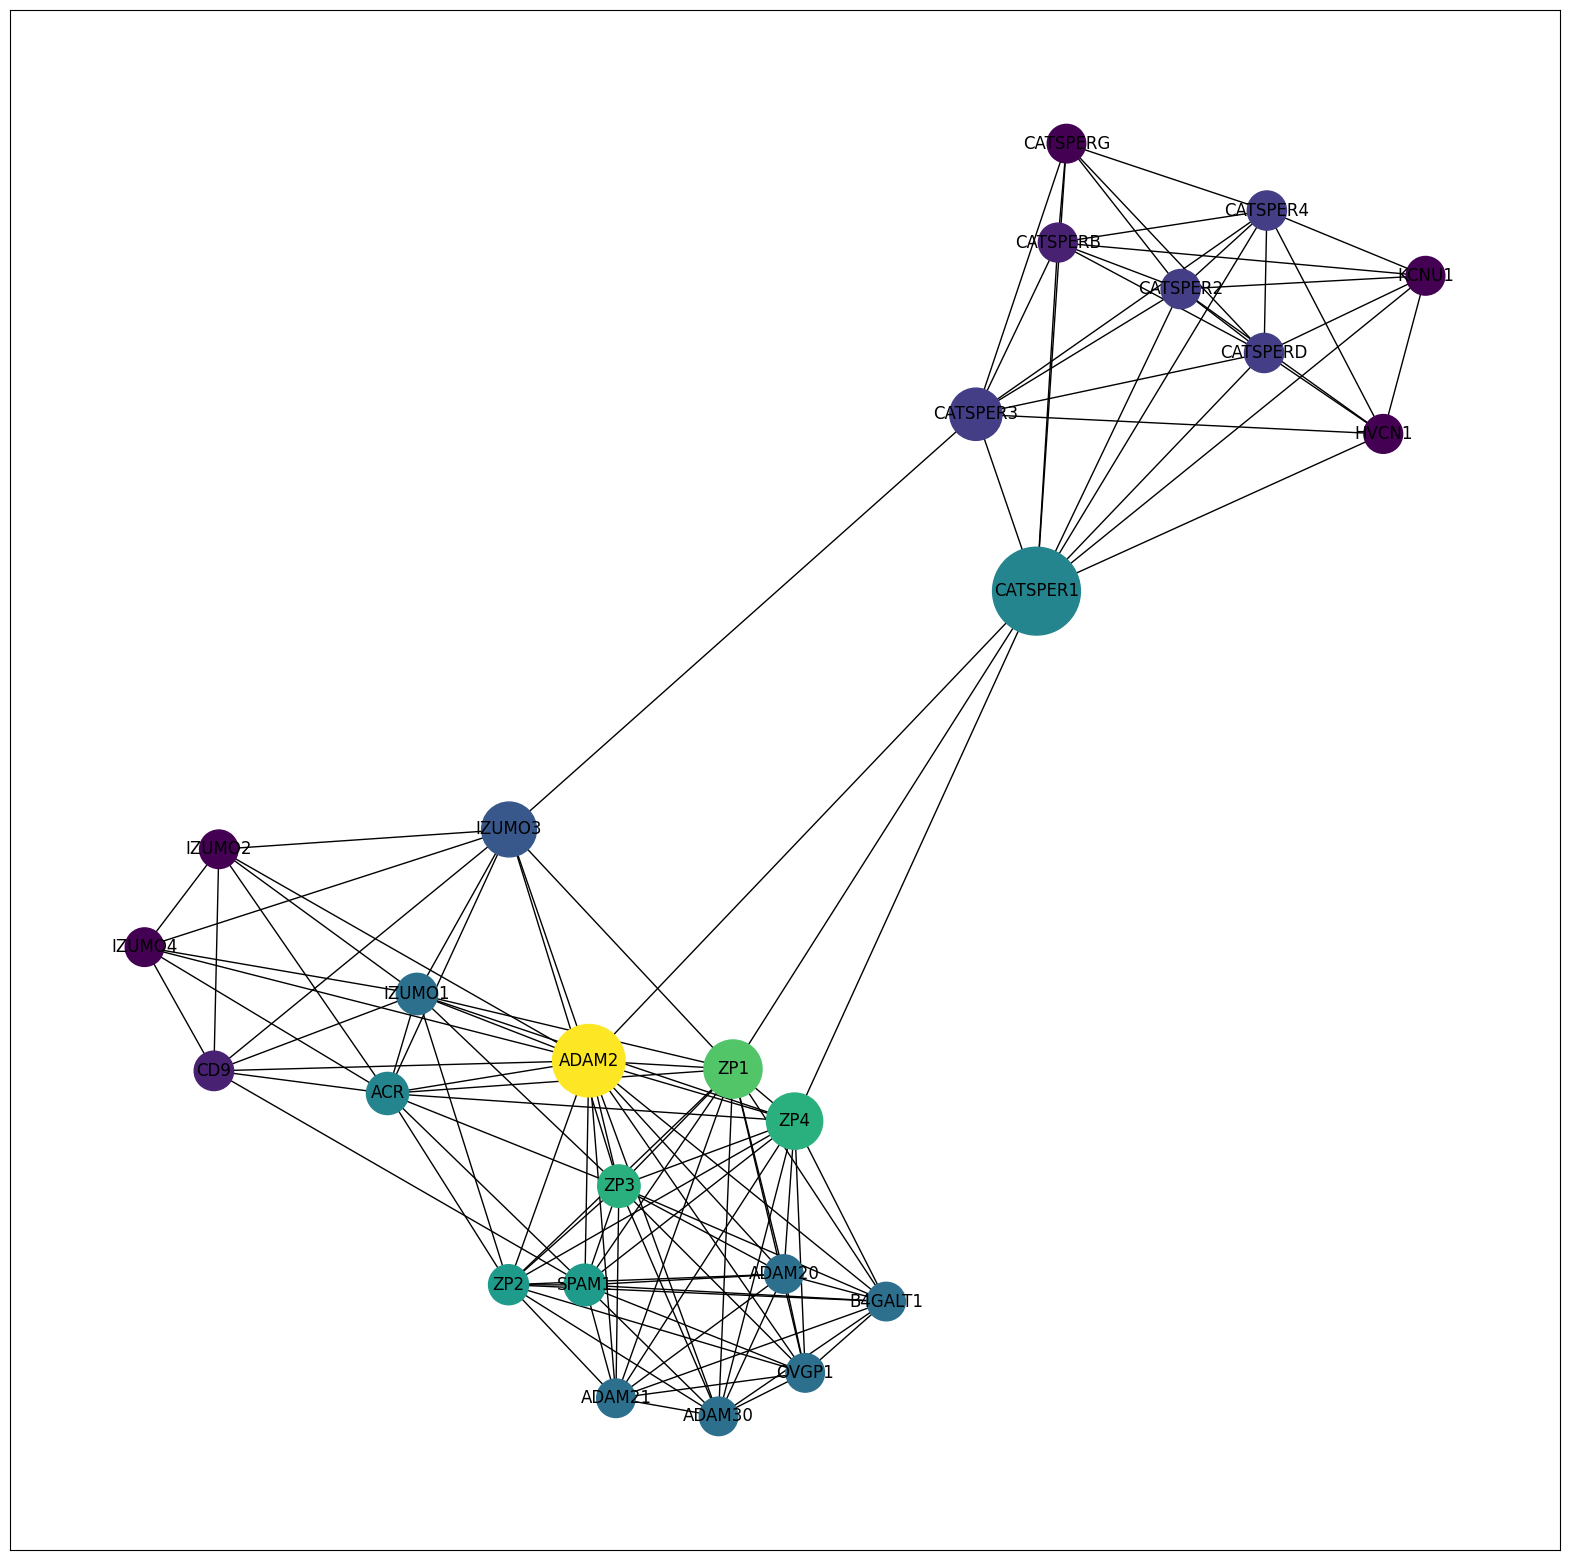

In [13]:
# Colour the nodes by degree and change the node size by betweenness centrality
pos = nx.spring_layout(fertilization)
betCent = nx.betweenness_centrality(fertilization, normalized=True, endpoints=True)
node_color = [20000.0 * fertilization.degree(v) for v in fertilization]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(fertilization, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )

In [ ]:
print(nx.average_clustering(fertilization))

0.8314395257834172